# Student Nane: Dhaniswar B.K. And StudentID: NP03A190318

# Applying Logistic Regression on Zoo to predict Class type of Animal

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("zoo.csv")
data

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
X = data.iloc[ : , :-1]
y = data.iloc[ : , 17: ]

In [5]:
X

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [6]:
y

,class_type
0,1
1,1
2,4
3,1
4,1
...,...
96,1
97,6
98,1
99,7


In [7]:
Animal_name =pd.get_dummies(X['animal_name'])

In [8]:
X = X.drop("animal_name", axis=1)

In [9]:
X = pd.concat([X,Animal_name], axis=1)

In [10]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,tuatara,tuna,vampire,vole,vulture,wallaby,wasp,wolf,worm,wren
0,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
97,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
98,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
99,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [11]:
X.shape

(101, 116)

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, 
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='multinomial', n_jobs=1, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2, random_state = 20)

In [15]:
model.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=100000, multi_class='multinomial', n_jobs=1,
                   solver='sag')

In [17]:
y_predicted = model.predict(X_test)
y_predicted

array([1, 1, 4, 1, 1, 4, 4, 2, 1, 7, 4, 1, 1, 7, 1, 2, 1, 1, 2, 6, 1, 1,
       7, 1, 1, 6, 2, 1, 1, 1, 1, 7, 1, 2, 4, 1, 4, 4, 1, 1, 1, 3, 2, 6,
       6, 1, 6, 7, 7, 2, 2, 1, 7, 7, 1, 1, 1, 1, 2, 7, 2, 2, 1, 1, 4, 2,
       1, 1, 4, 2, 1, 1, 2, 4, 1, 5, 2, 4, 7, 4, 1], dtype=int64)

In [18]:
model.score(X_test, y_test)

0.9012345679012346

In [24]:
from sklearn.metrics import confusion_matrix
fi = confusion_matrix(y_test, y_predicted)

In [25]:
fi

array([[36,  0,  0,  0,  0,  0,  0],
       [ 0, 14,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  1,  0,  0,  0],
       [ 0,  0,  0, 11,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0,  4,  3],
       [ 0,  0,  0,  0,  0,  1,  6]], dtype=int64)

Text(69.0, 0.5, 'Truth')

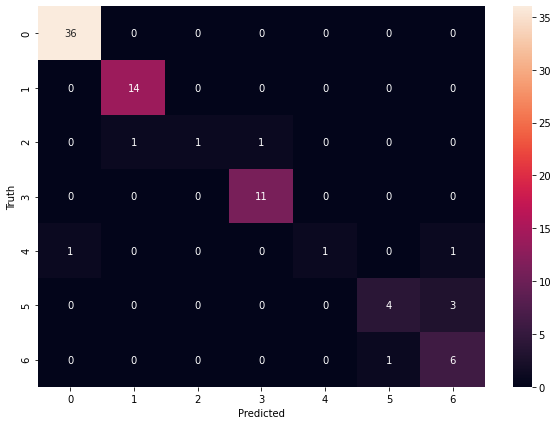

In [21]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(fi, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [22]:
print (pd.DataFrame(confusion_matrix(y_test, y_predict), columns=['Mammal=0','Bird=1','Reptile=2','Fish=3','Amphibia=4','Bug=5','Invertebrate=6']))

   Mammal=0  Bird=1  Reptile=2  Fish=3  Amphibia=4  Bug=5  Invertebrate=6
0        36       0          0       0           0      0               0
1         0      14          0       0           0      0               0
2         0       1          1       1           0      0               0
3         0       0          0      11           0      0               0
4         1       0          0       0           1      0               1
5         0       0          0       0           0      4               3
6         0       0          0       0           0      1               6


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.97      1.00      0.99        36
           2       0.93      1.00      0.97        14
           3       1.00      0.33      0.50         3
           4       0.92      1.00      0.96        11
           5       1.00      0.33      0.50         3
           6       0.80      0.57      0.67         7
           7       0.60      0.86      0.71         7

    accuracy                           0.90        81
   macro avg       0.89      0.73      0.75        81
weighted avg       0.91      0.90      0.89        81

